# CNN   small datasets 학습


- 학습할 Data의 개수가 많지 않을 때 CNN을 통한 모형 학습이 어려울 수 있음
  - 딥러닝은 많은 양의 데이터셋을 이용해 feature engineering 과정 없이 원하는 문제를 해결할 수 있다. => **Point: 많은 데이터 양**
- Data 양이 많지 않아 딥러닝 모델의 학습에 어려움이 있을 때 사용 가능한 방법
    - **Image augmentation 활용**
        - Image에 다양한 효과를 주어 데이터양을 늘린다.
            - Train dataset은 전체 대상 이미지들을 샘플링한 것이기 때문에 모든 형태를 다 가지고 있지 않다. Data augmentation은 train set의 이미지에 다양한 효과를 주어 실제 데이터셋과의 간격을 줄인다.
            - 영상데이터의 경우 각 영상 데이터의 색변경, 이미지잘라내기, 회전시키기, 명암변경 등을 적용하여 이미지들을 추가로 만들어 data의 수를 늘린다.
        - **모델의 Overfitting을 개선시킨다.**
        - pytorch image augmentation을 위한 클래스들
            - https://pytorch.org/vision/stable/transforms.html
    - **Pre-trained network**의 활용한 **Transfer learning (전이학습)**
        - 매우 큰 데이터셋으로 미리 Training한 모델을 이용해 모델을 정의한다.
        - 성능이 좋은모델을 다량의 데이터로 학습시킨 모델을 사용하므로 적은 데이터에도 좋은 성능을 낼 수있다.

# Image Augmentation 예제

In [2]:
import torch
from torchvision import transforms

import cv2
import matplotlib.pyplot as plt

In [10]:
img_path = 'dog.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [11]:
# 이미지 출력 함수
def image_show(img_path, transforms):
    """
    이미지 경로와 transforms를 받아서 적용한뒤 원본이미지와 처리된 이미지를 출력한다.
    transforms는 8번 적용시켜 출력한다.
    [parameter]
        img_path: str - transforms를 적용할 이미지 경로
        transforms: Transforms 객체. 단 ToTensor()가 첫번째 transforms로 정의되 있어야 한다.
    """
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
#     plt.rcParams['font.family'] = 'gulim'

    plt.figure(figsize=(15, 12))
    plt.subplot(3, 3, 1)
    plt.imshow(img)
    plt.title('원본')

    for i in range(2, 10): # 8번
        result_img = transforms (img)
        plt.subplot(3, 3, i)    
        plt.imshow(result_img.permute(1, 2, 0)) ## c,h,w 순을 h,w,c로 바꾸는 것

    plt.tight_layout()
    plt.show()

C:\Users\Yuseok\AppData\Roaming\Python\Python38\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
C:\Users\Yuseok\AppData\Local\Temp\ipykernel_12800\2142999574.py:23: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
C:\Users\Yuseok\AppData\Local\Temp\ipykernel_12800\2142999574.py:23: UserWarning: Glyph 48376 

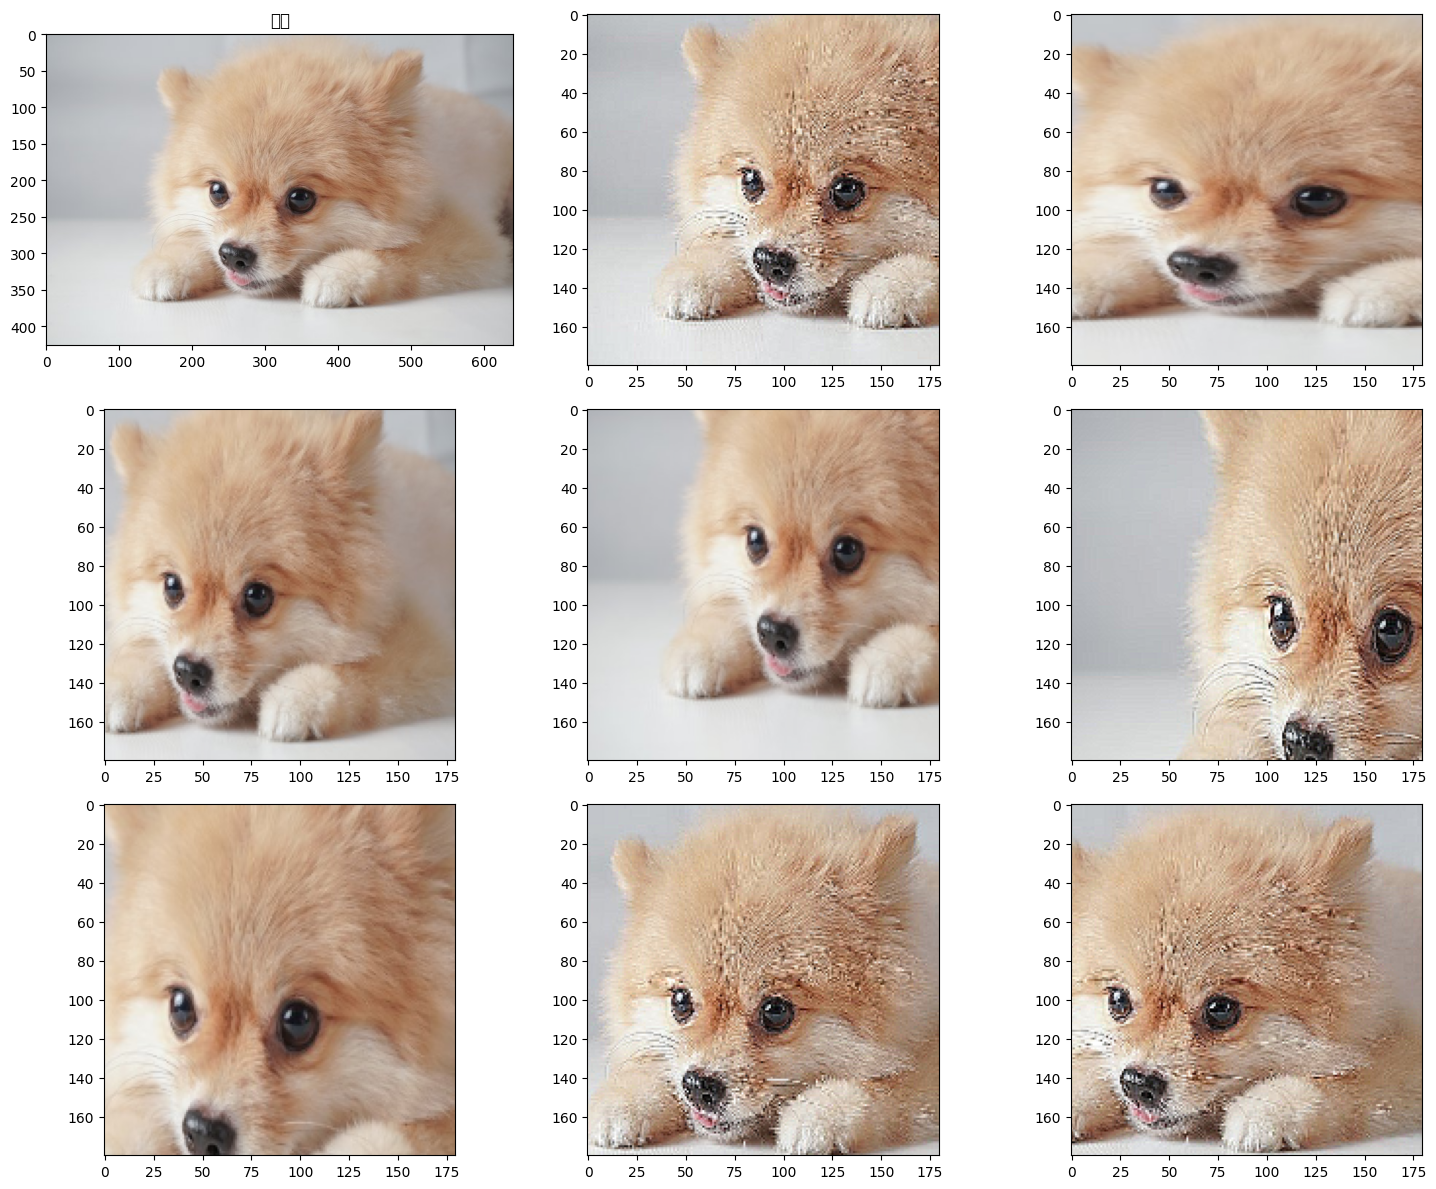

In [27]:

transform = transforms.Compose([
    transforms.ToTensor() ## ndarray/ PIL.image 를 Tensor로 변환. 0~1로 scaling, channel, height, width 순으로 축변경
    ###########################
    # 좌우/상하 반전. 
    ###########################
#     , transforms.RandomHorizontalFlip(p=0.5) # 좌우 반전 확률 포함
#     , transforms.RandomVerticalFlip(p=0.5) # 상하 반전 
    
    ###########################
    # 회전
    ###########################
#     , transforms.RandomRotation(degrees=180) # -180 ~ 180 튜플(-10,50)
    
    ###########################
    # affine 이동 변환들
    #  회전, 이동, 전단 변환 처리
    ###########################
#     , transforms.RandomAffine(degrees=(0,0),
#                               translate=(0.1,0.3),  # 이동
#                               shear=(0.8, 1.2),   # 전단변환
#                               scale=(0.5,1.2),   # 변환 후 크기 조정 
#                              )
    
    ###########################
    # 가우시안 블러
    ###########################
#     , transforms.GaussianBlur(kernel_size=(17,17), sigma=(1, 5)) 
    # sigma는 표준편차의 범위를 의미
    # kernel size, sigma는 값이 커지면 blur가 심해진다.
    
    ########################### 
    # 선명도 (Sharpen)
    ###########################
    , transforms.RandomAdjustSharpness(sharpness_factor=10, p=0.5) 
    # sharpeness_factor : 1 - same with origin, under 1 - blur, over 1 - sharp
    
    
    ###########################
    # 색관련 변환
    #  밝기, 대비, 채도, 색 변환 처리
    ###########################
#     , transforms.ColorJitter(brightness=(0.5, 1.2),  # 밝기
#                            contrast=(0.8, 1.2),   # 대비
#                            saturation=(0.5, 1.5),   # 채도
#                            hue=(-0.2, 0.2))    # 색변환
    
    #########################
    # Grayscale
    #########################
#     , transforms.RandomGrayscale(p=0.25) # grayscle로 바뀔 확률
    
    ############################
    # 반전 - 확률 지정할 수 있다.
    ############################
#     , transforms.RandomInvert(p=0.7) # 색 반전 확률 0->255, 244->11
    
    
    ###########################
    # Center 영역 Crop
    ###########################
#     , transforms.CenterCrop(150)
    
    ############################
    # RandomCrop - Crop 영역을 random하게 선택한다.
    ############################
#     , transforms.RandomCrop(150)

    ###########################
    # RandomResizedCrop - Random한 영역을 Crop후 지정한 종횡비 resize 한다.
    ###########################
    , transforms.RandomResizedCrop(180, # crop size h,w 둘다 180
                                   scale=(0.3, 0.7), # crop 후 resize할 비율 범위
                                   ratio=(0.5, 1.5)  # 종횡비
                                  )
    ##############################
    # 이미지를 부분적으로 삭제한다. (픽셀값을 0으로 변경)
    # p=확률, scale=() 삭제 크기범위, ratio=() 삭제 종횡비 범위 => 지정된 튜플 비율에서 random 하게 선택되 변경됨
    # occlusion(폐색-가려지는 문제)문제에서의 한계를 해결. https://deepapple.tistory.com/8
    ###############################
#     , transforms.RandomErasing()

])


image_show(img_path, transform)



C:\Users\Yuseok\AppData\Local\Temp\ipykernel_12800\2142999574.py:23: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
C:\Users\Yuseok\AppData\Local\Temp\ipykernel_12800\2142999574.py:23: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  plt.tight_layout()


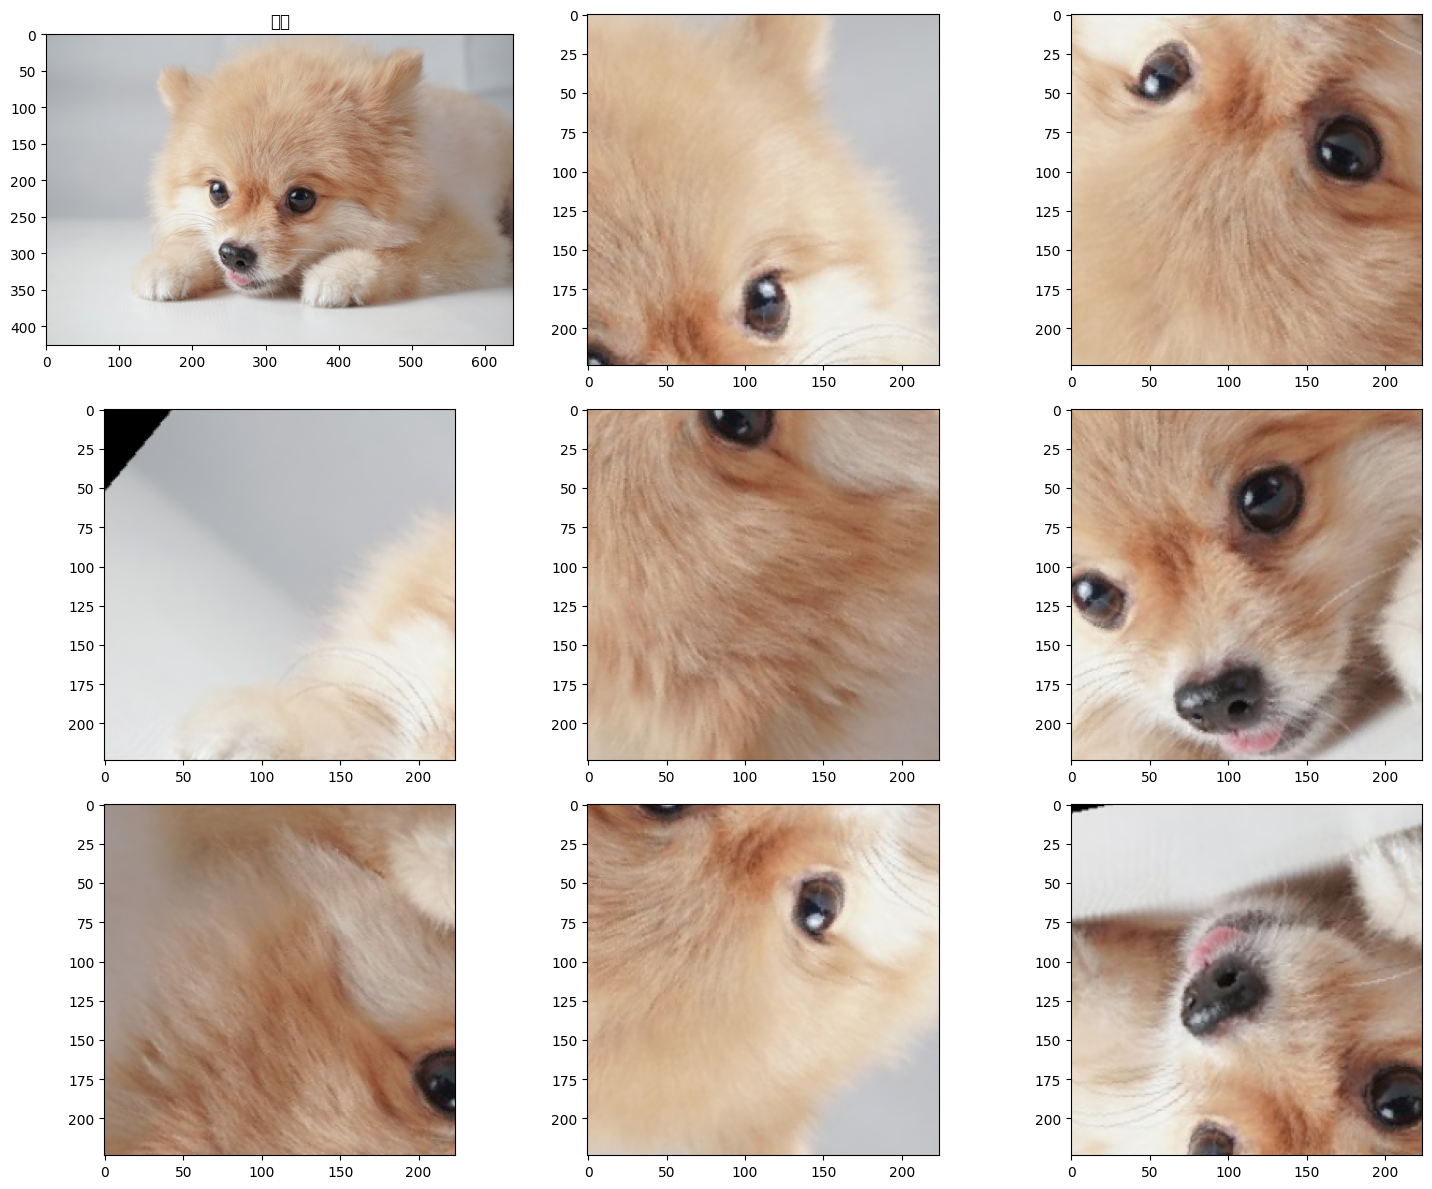

In [28]:

#####################################
# RandomApply() - 여러개 중 Random하게 여러개를 선택해서 적용한다. 선택 확률을 선택할 수 있다.
# RandomChoice() - 여러개 중 하나를 적용한다.
#####################################
transform2 = transforms.Compose([
    transforms.ToTensor()
    , transforms.RandomApply([ # 하위 4개를 모두 적용하는 것이 아니라 각각이 실행될 확률이 주어진다.
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(45), 
        transforms.RandomCrop((200,200)),
    ], p = 0.9)
    , transforms.Resize((224, 224), antialias=True)
])

# transform2 = transforms.Compose([
#     transforms.ToTensor()
#     , transforms.RandomChoice([
#         transforms.RandomRotation(45), 
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomVerticalFlip(),
#     ])
#     , transforms.Resize((224, 224), antialias=True)
# ])

image_show(img_path, transform2)